# Suspicion 1
- If using the old model for sinusoidal, it can't predict the sin data that I re-preprocessed & created
- Is it because of zero centering & normalization issue?

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, cbar = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if cbar == True:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/train with chirp-one model one output _ re-preprocessed data.h5")

In [51]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 batch_normalization_70 (Ba  (None, 198, 198, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 batch_normalization_71 (Ba  (None, 97, 97, 32)        128       
 tchNormalization)                                               
                                                     

In [50]:
model = keras.models.load_model("/Volumes/KleeFD/models/Testing effect of window size/one thirds/iter 2.h5")
model = keras.models.load_model("/Users/kunwoosmac/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Lab PC backup/Pitching Airfoil/models/Testing effect of window size/one thirds/iter 1.h5")
model = keras.models.load_model("/Users/kunwoosmac/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Lab PC backup/Pitching Airfoil/models/Testing effect of window size/one thirds/iter1.keras")

# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

In [39]:
categories = []

boa_cat = [25.0]*8 + [30.0]*8
freq_cat = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for b, f in zip(boa_cat, freq_cat):
    categories.append((str(b) + ', '+ str(f)))

In [40]:
dir = "/Volumes/KleeFD/dataset/dataset_chirp/04_sinusoidal + chirp _repreprocessed"

In [41]:
test_X = np.load(dir + '/test_X.npy')
test_Y = np.load(dir + '/test_Y.npy')

chirp = np.where(test_Y[:,2] == 'chirp')[0]
sin = np.where(test_Y[:,2] == 'sin')[0]

chirp.shape, sin.shape

((270,), (1682,))

In [42]:
chirp_Y = test_Y[chirp]
sin_Y = test_Y[sin]

chirp_X = test_X[chirp]
sin_X = test_X[sin]

In [43]:
Y = np.zeros((len(chirp_Y), 1), dtype = '<U10')
for i in range(len(chirp_Y)):
    Y[i] = (str(chirp_Y[i,0])+', '+ str(chirp_Y[i, 1]))
chirp_Y = Y

# Sinusoidal Evaluation

In [44]:
pred_proba = model.predict(sin_X)

53/53 [==============================] - 4s 57ms/step


In [45]:
Y = np.zeros((len(sin_Y), 1), dtype = '<U10')
for i in range(len(sin_Y)):
    Y[i] = (str(sin_Y[i,0])+', '+ str(sin_Y[i, 1]))
sin_Y = Y

In [46]:
sin_Y[0:10]

array([['30.0, 0.35'],
       ['25.0, 0.5'],
       ['25.0, 0.3'],
       ['30.0, 0.5'],
       ['30.0, 0.3'],
       ['30.0, 0.35'],
       ['30.0, 0.25'],
       ['25.0, 0.1'],
       ['30.0, 0.1'],
       ['25.0, 0.1']], dtype='<U10')

In [47]:
pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(sin_Y, pred))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.37      0.54        60
   25.0, 0.1       0.88      1.00      0.94        60
   25.0, 0.2       0.95      0.93      0.94        60
  25.0, 0.25       0.00      0.00      0.00        60
   25.0, 0.3       0.41      1.00      0.59        60
  25.0, 0.35       0.14      1.00      0.24        60
   25.0, 0.4       1.00      0.33      0.50        60
   25.0, 0.5       0.00      0.00      0.00        60
  30.0, 0.05       0.00      0.00      0.00       151
   30.0, 0.1       1.00      0.05      0.09       150
   30.0, 0.2       1.00      0.90      0.95       151
  30.0, 0.25       1.00      0.53      0.69       150
   30.0, 0.3       0.00      0.00      0.00       150
  30.0, 0.35       0.27      0.99      0.43       150
   30.0, 0.4       0.00      0.00      0.00       150
   30.0, 0.5       1.00      1.00      1.00       150

    accuracy                           0.48      1682
   macro avg       0.54   

/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Confusion matrix, without normalization


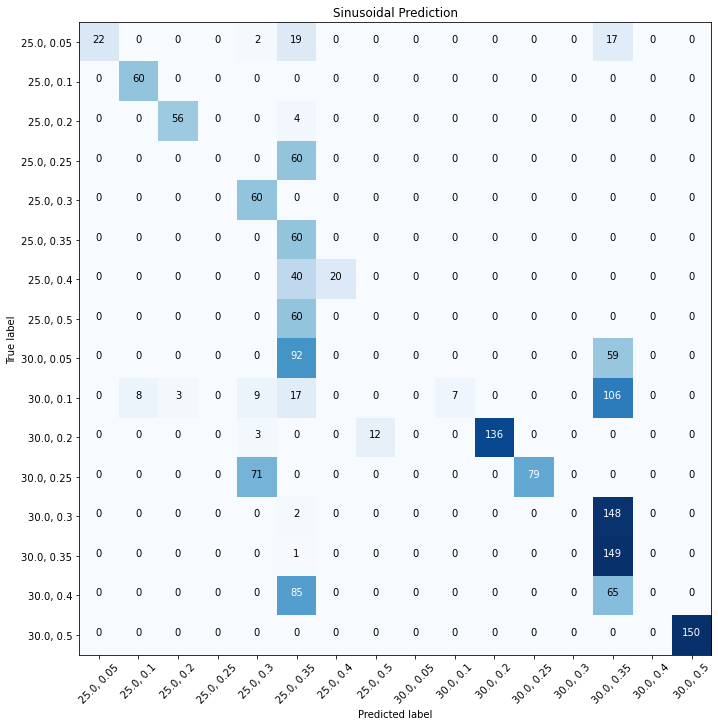

In [48]:
cnf_matrix = confusion_matrix(sin_Y, pred)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Sinusoidal Prediction')
plt.show()

## Redo the normlization & zero-centering for sinusoidal and check again

In [62]:
test_X = np.load(dir + '/test_X.npy')
test_Y = np.load(dir + '/test_Y.npy')

chirp = np.where(test_Y[:,2] == 'chirp')[0]
sin = np.where(test_Y[:,2] == 'sin')[0]

chirp.shape, sin.shape

chirp_Y = test_Y[chirp]
sin_Y = test_Y[sin]

chirp_X = test_X[chirp]
sin_X = test_X[sin]

Y = np.zeros((len(sin_Y), 1), dtype = '<U10')
for i in range(len(sin_Y)):
    Y[i] = (str(sin_Y[i,0])+', '+ str(sin_Y[i, 1]))
sin_Y = Y

In [63]:
sin_X -= np.mean(sin_X, axis = 0)

test_ux = sin_X[:,0:100,:,:]; test_uy = sin_X[:,100:200,:,:]

test_ux = test_ux/(np.max(test_ux) - np.min(test_ux))
test_uy = test_ux/(np.max(test_uy) - np.min(test_uy))

In [64]:
np.mean(sin_X), np.max(sin_X), np.min(sin_X)

(-4.959436217493209e-19, 0.47832503748268035, -0.558466208868863)

In [65]:
pred_proba = model.predict(sin_X)

53/53 [==============================] - 3s 57ms/step


In [66]:
pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(sin_Y, pred))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.38      0.55        60
   25.0, 0.1       0.88      1.00      0.94        60
   25.0, 0.2       0.95      0.93      0.94        60
  25.0, 0.25       0.00      0.00      0.00        60
   25.0, 0.3       0.42      1.00      0.59        60
  25.0, 0.35       0.13      1.00      0.23        60
   25.0, 0.4       1.00      0.02      0.03        60
   25.0, 0.5       0.00      0.00      0.00        60
  30.0, 0.05       0.00      0.00      0.00       151
   30.0, 0.1       1.00      0.03      0.06       150
   30.0, 0.2       1.00      0.90      0.95       151
  30.0, 0.25       1.00      0.55      0.71       150
   30.0, 0.3       0.00      0.00      0.00       150
  30.0, 0.35       0.27      1.00      0.43       150
   30.0, 0.4       0.00      0.00      0.00       150
   30.0, 0.5       1.00      1.00      1.00       150

    accuracy                           0.47      1682
   macro avg       0.54   

/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Doesn't fix the issue
- Load the original dataset to compare

In [71]:
dir = '/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds'
test_X = np.load(dir + '/test_X.npy')
test_Y = np.load(dir + '/test_Y.npy')

Y = np.zeros((len(test_Y), 1), dtype = '<U10')
for i in range(len(test_Y)):
    Y[i] = (str(test_Y[i,0])+', '+ str(test_Y[i, 1]))
test_Y = Y

In [72]:
pred_proba = model.predict(test_X)

pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(test_Y, pred))

53/53 [==============================] - 2s 37ms/step
              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.62      0.77        56
   25.0, 0.1       0.84      1.00      0.91        56
   25.0, 0.2       1.00      0.90      0.95        52
  25.0, 0.25       0.00      0.00      0.00        52
   25.0, 0.3       0.40      1.00      0.58        55
  25.0, 0.35       0.14      1.00      0.24        56
   25.0, 0.4       1.00      0.42      0.59        67
   25.0, 0.5       0.00      0.00      0.00        57
  30.0, 0.05       0.00      0.00      0.00       154
   30.0, 0.1       1.00      0.06      0.12       154
   30.0, 0.2       1.00      0.85      0.92       158
  30.0, 0.25       1.00      0.57      0.73       158
   30.0, 0.3       0.00      0.00      0.00       155
  30.0, 0.35       0.28      0.99      0.43       154
   30.0, 0.4       0.00      0.00      0.00       143
   30.0, 0.5       1.00      1.00      1.00       153

    accuracy              

/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# ??? Using iter 1 model with original data -> accuracy 0.48
# Something wrong with the model
- retrained and checking

In [26]:
model = keras.models.load_model("/Volumes/KleeFD/test.h5")

OSError: No file or directory found at /Volumes/KleeFD/test.h5

In [5]:
categories = []

boa_cat = [25.0]*8 + [30.0]*8
freq_cat = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for b, f in zip(boa_cat, freq_cat):
    categories.append((str(b) + ', '+ str(f)))

In [6]:
dir = "/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds"

In [7]:
test_X = np.load(dir + '/test_X.npy')
test_Y = np.load(dir + '/test_Y.npy')

((270,), (1682,))

In [9]:
Y = np.zeros((len(chirp_Y), 1), dtype = '<U10')
for i in range(len(chirp_Y)):
    Y[i] = (str(chirp_Y[i,0])+', '+ str(chirp_Y[i, 1]))
chirp_Y = Y

# Sinusoidal Evaluation

In [10]:
pred_proba = model.predict(sin_X)

53/53 [==============================] - 2s 40ms/step


In [11]:
Y = np.zeros((len(sin_Y), 1), dtype = '<U10')
for i in range(len(sin_Y)):
    Y[i] = (str(sin_Y[i,0])+', '+ str(sin_Y[i, 1]))
sin_Y = Y

In [12]:
sin_Y[0:10]

array([['30.0, 0.35'],
       ['25.0, 0.5'],
       ['25.0, 0.3'],
       ['30.0, 0.5'],
       ['30.0, 0.3'],
       ['30.0, 0.35'],
       ['30.0, 0.25'],
       ['25.0, 0.1'],
       ['30.0, 0.1'],
       ['25.0, 0.1']], dtype='<U10')

In [13]:
pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(sin_Y, pred))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      1.00      1.00        60
   25.0, 0.1       0.95      1.00      0.98        60
   25.0, 0.2       1.00      1.00      1.00        60
  25.0, 0.25       1.00      1.00      1.00        60
   25.0, 0.3       1.00      1.00      1.00        60
  25.0, 0.35       1.00      1.00      1.00        60
   25.0, 0.4       0.50      1.00      0.67        60
   25.0, 0.5       0.00      0.00      0.00        60
  30.0, 0.05       1.00      0.70      0.82       151
   30.0, 0.1       0.94      0.93      0.93       150
   30.0, 0.2       1.00      1.00      1.00       151
  30.0, 0.25       1.00      1.00      1.00       150
   30.0, 0.3       1.00      1.00      1.00       150
  30.0, 0.35       0.77      1.00      0.87       150
   30.0, 0.4       0.98      0.99      0.98       150
   30.0, 0.5       1.00      1.00      1.00       150

    accuracy                           0.93      1682
   macro avg       0.88   

/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kunwoosmac/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Confusion matrix, without normalization


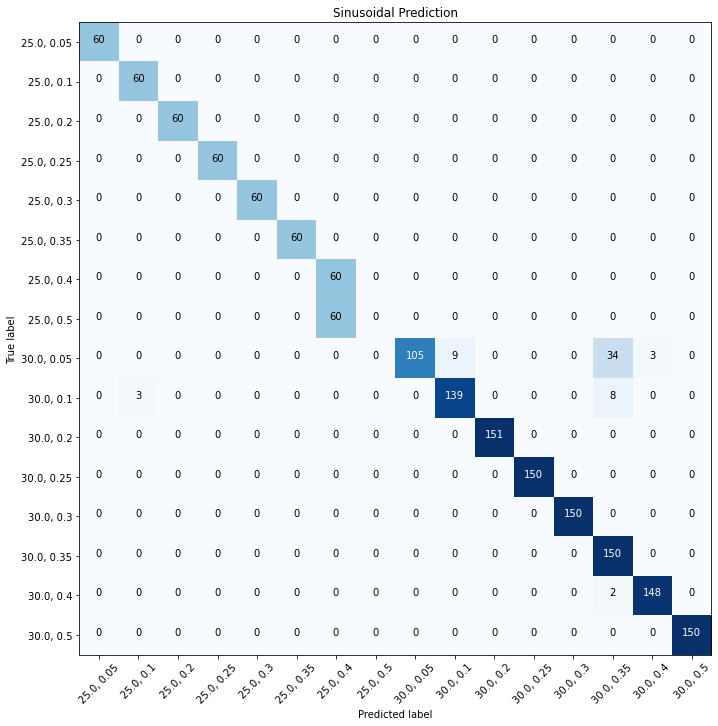

In [14]:
cnf_matrix = confusion_matrix(sin_Y, pred)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Sinusoidal Prediction')
plt.show()